# Imporing Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eda_helper_functions
from sklearn.ensemble import IsolationForest

# Read the Training Data

In [2]:
file_path=r"F:\DATA_SCIENCE\Machile_learing_projects\Campusx_projects\Flight_Price_Prediction\Data\train.csv"

In [3]:
train=pd.read_csv(file_path)

In [4]:
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-06-12,Delhi,Cochin,02:00:00,07:45:00,345,1.0,No info,6386
1,Air Asia,2019-05-21,Kolkata,Banglore,22:40:00,10:40:00,720,1.0,No info,9719
2,Indigo,2019-04-01,Kolkata,Banglore,17:15:00,19:50:00,155,0.0,No info,4174
3,Jet Airways,2019-03-06,Banglore,New Delhi,08:00:00,07:40:00,1420,1.0,No info,14815
4,Air India,2019-03-15,Chennai,Kolkata,11:40:00,13:55:00,135,0.0,No info,7082


In [5]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [6]:
train=train.assign(**{
    col:pd.to_datetime(train.loc[:,col])
    for col in ['date_of_journey','dep_time','arrival_time']
})

C:\Users\rajkr\AppData\Local\Temp\ipykernel_16704\3435688279.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col:pd.to_datetime(train.loc[:,col])
C:\Users\rajkr\AppData\Local\Temp\ipykernel_16704\3435688279.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col:pd.to_datetime(train.loc[:,col])


In [7]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [8]:
# # High level summary of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [9]:
# Taking some statistical information
train.describe(include='number')

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,656.953125,0.817187,8825.834375
std,515.050871,0.656747,4260.001475
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5073.000000
50%,545.000000,1.000000,8040.000000
75%,960.000000,1.000000,12193.500000
max,2345.000000,3.000000,36235.000000


In [10]:
train.describe(include='O')

,airline,source,destination,additional_info
count,640,640,640,640
unique,8,5,6,4
top,Jet Airways,Delhi,Cochin,No info
freq,223,261,261,514


In [11]:
#how to include numerical varaiable into categorical and then we are using describe function
(
    train
    .assign(total_stops=train['total_stops'].astype(object))
    .describe(include='O')
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No info
freq,223,261,261,349.0,514


## High-level analysis of missing values

In [12]:
#using our library which we made for EDA
#there is no missing value
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


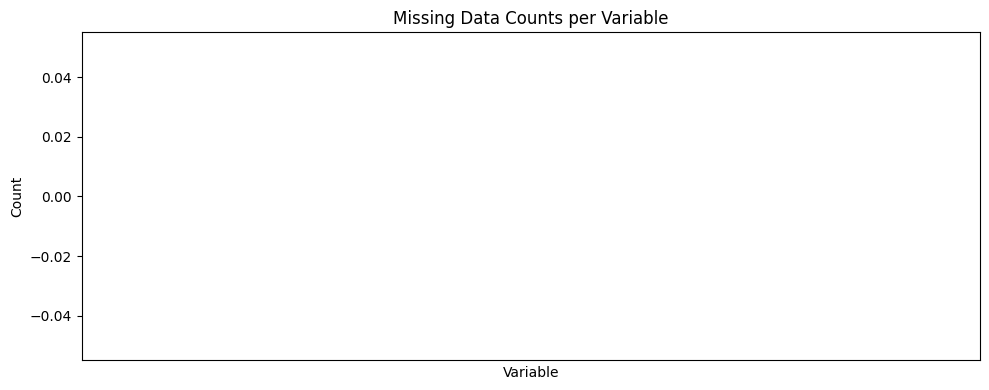

In [13]:
eda_helper_functions.plot_missing_info(train)
#the graph says that there are no missing value in any column

# High level Analysis of Outliers

In [18]:
forest=IsolationForest(n_estimators=10,random_state=42)

In [23]:
#In this particular line of code we are droping our target column
# Applying the IsolationForest algorithm on our dataset
# After applying this algorithm it will crate a column and in this column the information is present in the form of -1 and 1
# here -1 is outliears present and 1 is outlier is nor present
(
    train
    .assign(outlier=forest.fit_predict(train
                                       .drop(columns='price')
                                       .select_dtypes(include='number')))
    .query('outlier==-1')
)
#the query function is help us to do filteration task on the dataset

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
3,Jet Airways,2019-03-06,Banglore,New Delhi,2024-05-07 08:00:00,2024-05-07 07:40:00,1420,1.0,No info,14815,-1
4,Air India,2019-03-15,Chennai,Kolkata,2024-05-07 11:40:00,2024-05-07 13:55:00,135,0.0,No info,7082,-1
13,Indigo,2019-04-12,Kolkata,Banglore,2024-05-07 14:25:00,2024-05-07 16:55:00,150,0.0,No info,5224,-1
15,Air India,2019-05-18,Kolkata,Banglore,2024-05-07 16:45:00,2024-05-07 12:30:00,1185,2.0,No info,15170,-1
17,Air India,2019-06-09,Kolkata,Banglore,2024-05-07 07:00:00,2024-05-07 05:25:00,1345,2.0,No info,12534,-1
...,...,...,...,...,...,...,...,...,...,...,...
627,Jet Airways,2019-06-15,Delhi,Cochin,2024-05-07 18:20:00,2024-05-07 12:35:00,1095,2.0,No info,14300,-1
628,Air India,2019-05-21,Delhi,Cochin,2024-05-07 09:45:00,2024-05-07 09:25:00,1420,2.0,No info,10975,-1
629,Air Asia,2019-03-12,Kolkata,Banglore,2024-05-07 22:50:00,2024-05-07 01:20:00,150,0.0,No info,4082,-1
637,Air India,2019-03-24,Mumbai,Hyderabad,2024-05-07 15:00:00,2024-05-07 16:25:00,85,0.0,No info,2050,-1


# Pair plots

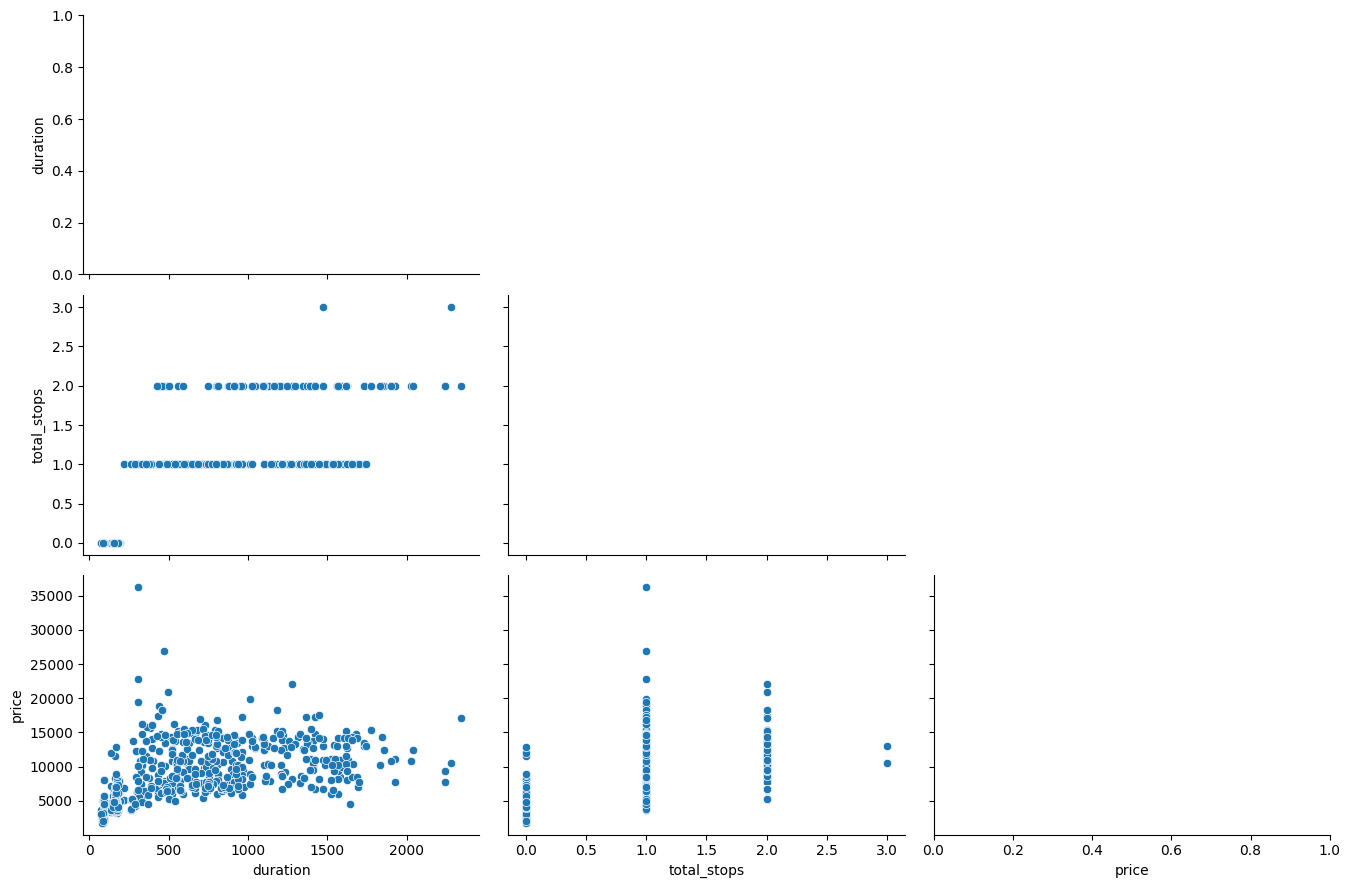

In [24]:
eda_helper_functions.pair_plots(train)
# In this graph you will notice that we only plot the lower half
# the pair plot is symmetric plot and here we aviod the repeted information , 
#for example you look at the duration and price there is linear relationship 

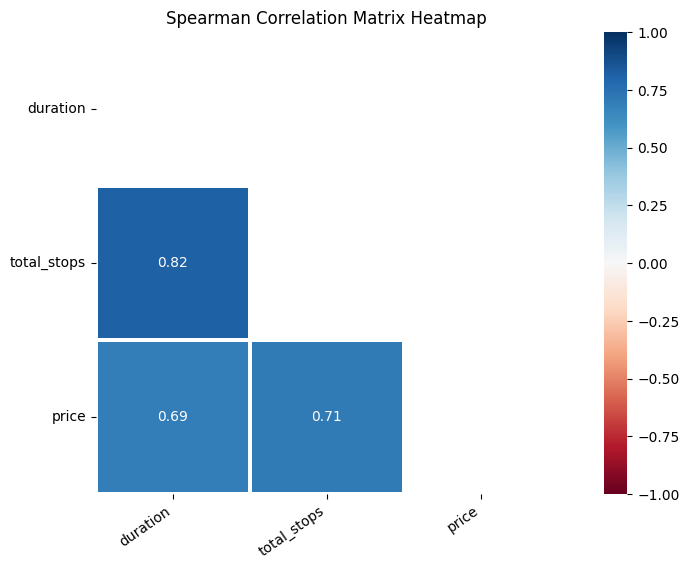

In [25]:
# Correlation Analysis
eda_helper_functions.correlation_heatmap(train,method='spearman')

In [26]:
train.corr(method='spearman',numeric_only=True)

,duration,total_stops,price
duration,1.000000,0.819531,0.687517
total_stops,0.819531,1.000000,0.710616
price,0.687517,0.710616,1.000000


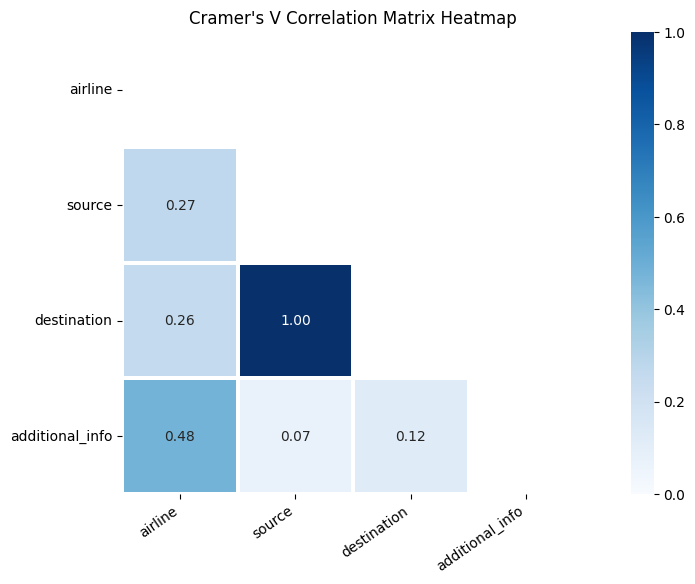

In [27]:
eda_helper_functions.cramersV_heatmap(train)